In [17]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("video_game_market.xlsx","genrePC")

data.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"Retour au menu ""Marché du jeu vidéo""",NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Marché du jeu vidéo PC selon le genre,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Le marché des jeux vidéo PC selon le genre (mi...,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2017.00,2018.00,2019.00,2020.00,2021.00
7,action,597366.54,503639.42,451063.97,694736.22,502794.67
8,stratégie,658888.22,616128.93,495256.70,539665.58,458420.13
9,aventure,229472.85,220322.38,229000.10,442130.00,265875.10


In [77]:
data_clean = data.dropna(axis = 0, how = 'all')
data_clean = data_clean.dropna(axis = 0,thresh=5) 
data_clean = data_clean.fillna({'Unnamed: 0': 'Genre'})
data_clean.columns = data_clean.iloc[0].apply(lambda x: int(math.trunc(x)) if pd.notna(x) and isinstance(x, (int, float)) else x)


data_clean.head(15)

6,Genre,2017,2018,2019,2020,2021
6,Genre,2017.00,2018.00,2019.00,2020.00,2021.00
7,action,597366.54,503639.42,451063.97,694736.22,502794.67
8,stratégie,658888.22,616128.93,495256.70,539665.58,458420.13
9,aventure,229472.85,220322.38,229000.10,442130.00,265875.10
10,jeu de tirs,502472.87,416841.88,436295.00,411191.30,278309.37
11,jeu de rôles,291465.39,346975.06,246741.99,379377.63,279319.54
12,sport,118805.58,113569.72,104128.94,138894.42,98938.74
13,course,97222.20,112007.92,90894.55,68931.97,55378.77
14,combat,62473.86,69175.16,50464.90,65324.61,80301.01
15,jeu casual,67856.23,44341.97,36328.40,63233.25,42503.67


In [115]:
df_genre = data_clean.iloc[1:17].reset_index(drop=True)

df_genre

6,Genre,2017,2018,2019,2020,2021
0,action,597366.54,503639.42,451063.97,694736.22,502794.67
1,stratégie,658888.22,616128.93,495256.70,539665.58,458420.13
2,aventure,229472.85,220322.38,229000.10,442130.00,265875.10
3,jeu de tirs,502472.87,416841.88,436295.00,411191.30,278309.37
4,jeu de rôles,291465.39,346975.06,246741.99,379377.63,279319.54
5,sport,118805.58,113569.72,104128.94,138894.42,98938.74
6,course,97222.20,112007.92,90894.55,68931.97,55378.77
7,combat,62473.86,69175.16,50464.90,65324.61,80301.01
8,jeu casual,67856.23,44341.97,36328.40,63233.25,42503.67
9,simulation aérienne,3287.16,2867.00,12758.82,35110.24,17952.18


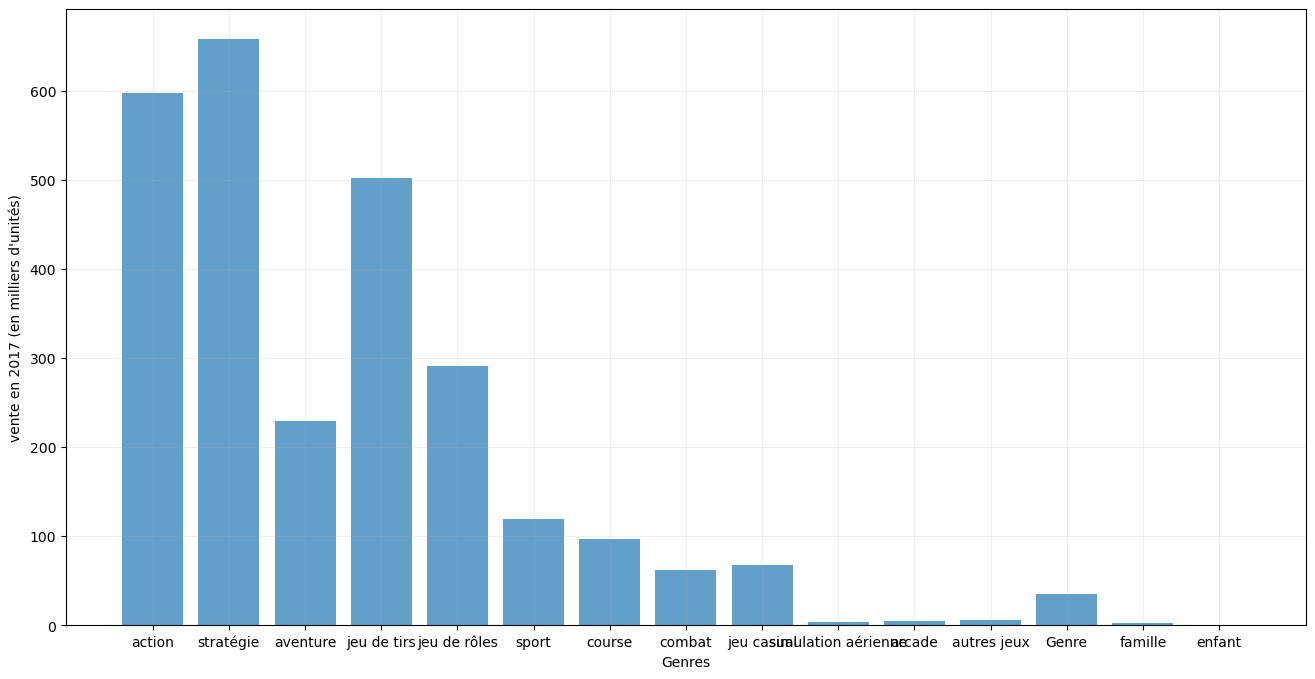

In [121]:
n_genres = len(df_genre["Genre"])
largeur = n_genres * 1  

# Définition de la taille de la figure
plt.figure(figsize=(largeur, 8))

plt.bar(df_genre["Genre"][:-1], df_genre[2017][:-1]/1000, alpha=0.7)  

plt.xlabel("Genres") 
plt.ylabel("vente en 2017 (en milliers d'unités)") 
plt.grid(True, alpha=0.2) #ajout d'une grille en arrière plan

plt.show()
